# Linear Regression via Gradient descent

In [5]:
import numpy as py
import math, copy
import matplotlib.pyplot as plt

### Cost function
or *loss function*, it is specifically *Squared error cost function* here.
$$J(w,b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^2\tag{1}$$
### Gradient descent 
A mathematical method to find the *minimum* value of a function by constantly looking for the *steepest* descent of the function using partial derivatives of its independent variables. The following is **batch gradient descent**, the **batch** means that we take all data points into account.
Here is the descending formula, taking $J(w,b)$ a cost function with 2 parameters as example: 
$$w = w - \alpha\frac{\partial J(w,b)}{\partial w}\tag{1}$$
$$b = b - \alpha\frac{\partial J(w,b)}{\partial b}\tag{2}$$
> $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ are the slopes pointing **away** from the local minimum.
> Be cautious that, the upon are updated simultaneously, be careful when implementing it in code.

$$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})$$
$$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)}$$
### Code implementation
- implement with 2 variables $w$, $\beta$.
- consist of 3 functions:
    - compute cost function *(optional)*
    - compute gradient
    - gradient descent

In [35]:
def cost_function(x,y,w,b):
    m = x.shape[0]
    J_x = 0
    for i in range(m):    
        f_wb = w*x[i] + b 
        J_x += (y[i] - f_wb) ** 2
    J_x = (1/2*m) *(J_x)
    return J_x
        

In [36]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_db = 0
    dj_dw = 0
    for i in range(m):
        dj_db = dj_db +  (w*x[i]+b -y[i])
        dj_dw = dj_dw +  (w*x[i]+b -y[i]) * x[i]
    dj_db = 1/m * dj_db
    dj_dw = 1/m * dj_dw
    return dj_db, dj_dw

In [37]:
def gradient_descent(x,y,w_in,b_in,iteration_times=10000, lr=0.1):
    m = x.shape[0] 
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    for i in range(min(iteration_times, 10000)):
        dj_db, dj_dw = compute_gradient(x,y,w,b)
        w, b = w - dj_dw * lr, b - dj_db * lr
    return w, b

In [38]:
def compute_output(x,w,b):
    m = x.shape[0]
    fwb = py.zeros(m)
    for i in range(m):
        fwb[i] = w*x[i] + b
    return fwb

### Testing

In [39]:
# initialisation
x_train = py.array([1,2,3])
y_train = py.array([400,2100,2900])
w, b = 0, 0

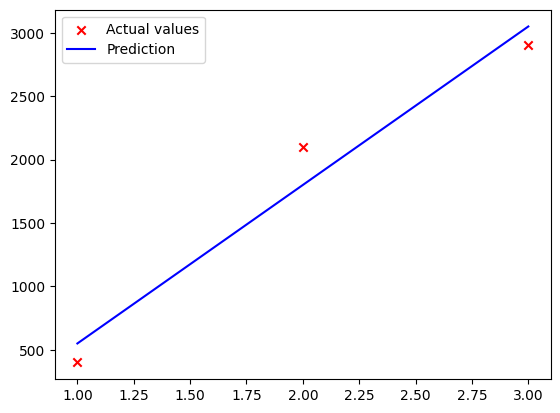

In [34]:
# find the most regression line
w, b = gradient_descent(x_train,y_train,w,b)
plt.scatter(x_train, y_train, marker="x", c = "r", label = "Actual values")
plt.plot(x_train,compute_output(x_train,w,b) , c= "b",label = "Prediction")
plt.legend()
plt.show()